In [1]:
import xarray as xr

import numpy as np

import os

import matplotlib.pyplot as plt

In [2]:
rt_dir = "/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/input_data"
out_surf = os.path.join(rt_dir, "input_surface.npy")
out_atmos = os.path.join(rt_dir, "input_upper.npy")

In [3]:
era_surf = "/discover/nobackup/jli30/data/Aurora/2024-12-01-surface-level.nc"
ds = xr.open_dataset(era_surf)
variables = ['msl', 'u10', 'v10', 't2m']
data = np.stack([ds[v].isel(valid_time=0).values for v in variables])
in_surf = data
np.save(out_surf, data)

In [4]:
era_atmos = "/discover/nobackup/jli30/data/Aurora/2024-12-01-atmospheric.nc"
ds = xr.open_dataset(era_atmos)
variables = ['z', 'q', 't', 'u', 'v']
data = np.stack([ds[v].isel(valid_time=0).values for v in variables])
np.save(out_atmos, data)

## CHECK output

In [8]:
o_surf = np.load("/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface.npy")
o_surf

array([[[ 1.02951367e+05,  1.02938664e+05,  1.02918742e+05, ...,
          1.02899867e+05,  1.02876773e+05,  1.02865297e+05],
        [ 1.02861969e+05,  1.02858656e+05,  1.02850273e+05, ...,
          1.02815578e+05,  1.02804133e+05,  1.02802203e+05],
        [ 1.02812914e+05,  1.02813797e+05,  1.02819078e+05, ...,
          1.02768531e+05,  1.02768664e+05,  1.02765383e+05],
        ...,
        [ 9.94760547e+04,  9.94638047e+04,  9.94452656e+04, ...,
          9.94875000e+04,  9.94720391e+04,  9.94689141e+04],
        [ 9.95217891e+04,  9.95168203e+04,  9.95121484e+04, ...,
          9.95509062e+04,  9.95420000e+04,  9.95186250e+04],
        [ 1.00369898e+05,  1.00464742e+05,  1.00364445e+05, ...,
          1.00538555e+05,  1.00442680e+05,  1.00426727e+05]],

       [[-6.16157532e+00, -6.24395037e+00, -6.21398401e+00, ...,
         -6.30474520e+00, -6.26770687e+00, -6.20136881e+00],
        [-4.67005110e+00, -4.48338318e+00, -4.40065956e+00, ...,
         -4.62618732e+00, -4.57563400e

In [10]:
o_surf.shape

(4, 721, 1440)

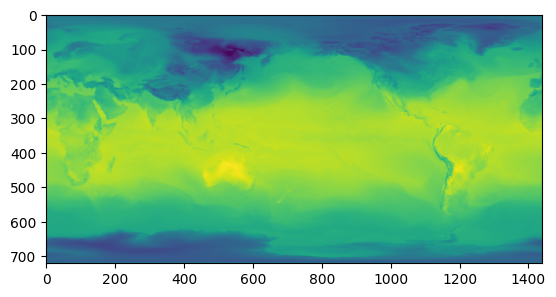

In [12]:
plt.imshow(o_surf[3,...].squeeze())

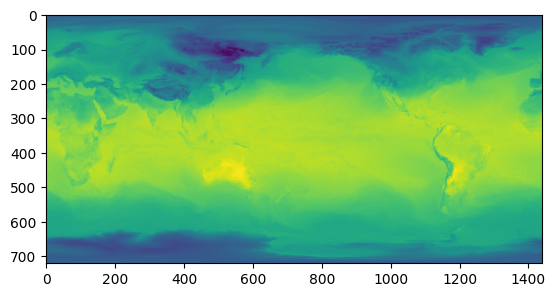

In [14]:
plt.imshow(in_surf[3,...].squeeze())

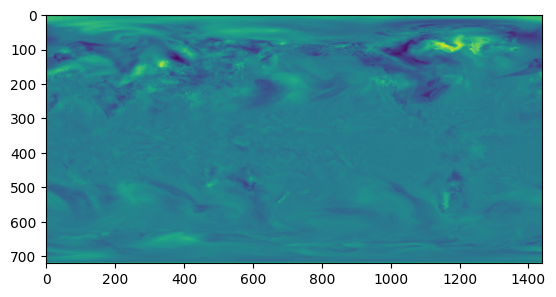

In [15]:
plt.imshow(o_surf[3,...].squeeze() - in_surf[3,...].squeeze())